In [4]:
import pandas as pd
import numpy as np

import os
import sys
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.cluster import KMeans

sns.set(style="darkgrid")

In [30]:
ad_data = pd.read_csv('adult.data.txt', header=None)
ad_data.shape

(32561, 15)

In [31]:
ad_data.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [52]:
ad_data['annual_revenue_above_50k'] = ad_data[14].str.contains('>')
ad_data.annual_revenue_above_50k

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7         True
8         True
9         True
10        True
11        True
12       False
13       False
14        True
15       False
16       False
17       False
18       False
19        True
20        True
21       False
22       False
23       False
24       False
25        True
26       False
27        True
28       False
29       False
         ...  
32531    False
32532     True
32533     True
32534    False
32535    False
32536     True
32537    False
32538     True
32539     True
32540    False
32541    False
32542    False
32543    False
32544    False
32545     True
32546    False
32547    False
32548    False
32549    False
32550    False
32551    False
32552    False
32553    False
32554     True
32555    False
32556    False
32557     True
32558    False
32559    False
32560     True
Name: annual_revenue_above_50k, Length: 32561, dtype: bool

# Revenue histogram by gender 

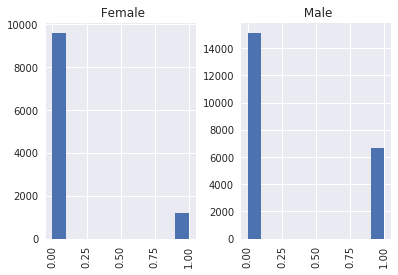

In [54]:
ad_data['annual_revenue_above_50k'].hist(by=ad_data[9])
plt.show()

In [107]:
groups_gender = ad_data.groupby(by=9)['annual_revenue_above_50k']
female_prior, male_prior = groups_gender.mean()

0.10946058861758426

In [94]:
#np.random.binomial(1, male_prior, size=300)

In [101]:
#np.random.binomial(1, female_prior, size=100)

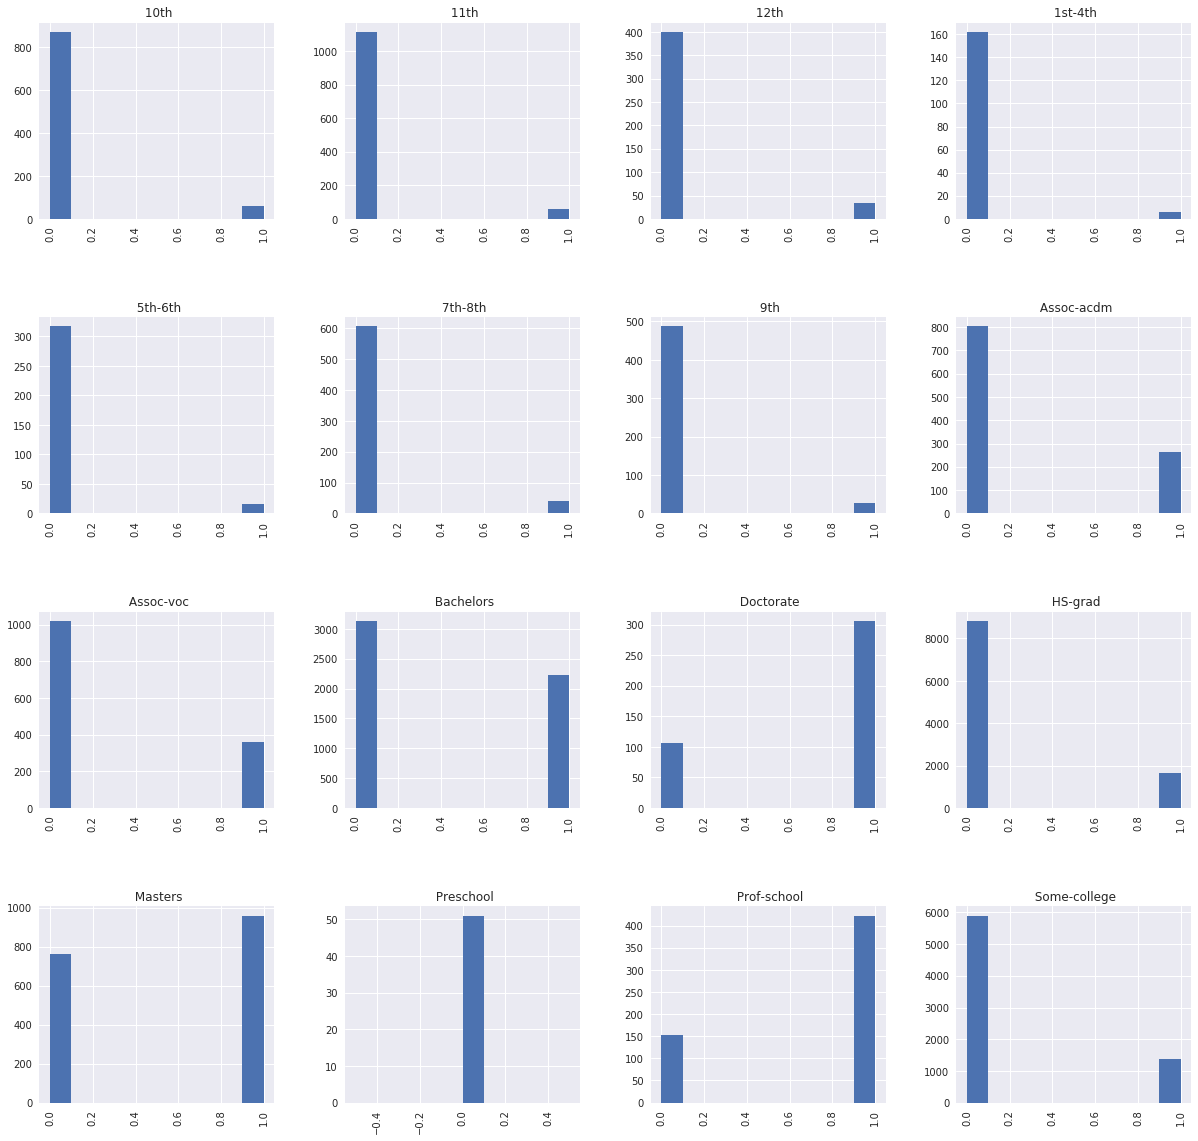

In [103]:
ad_data['annual_revenue_above_50k'].hist(by=ad_data[3], figsize=(20,20))
plt.show()

In [108]:
groups_education = ad_data.groupby(by=3)['annual_revenue_above_50k']
results = groups_education.mean()
results

3
 10th            0.066452
 11th            0.051064
 12th            0.076212
 1st-4th         0.035714
 5th-6th         0.048048
 7th-8th         0.061920
 9th             0.052529
 Assoc-acdm      0.248360
 Assoc-voc       0.261216
 Bachelors       0.414753
 Doctorate       0.740920
 HS-grad         0.159509
 Masters         0.556587
 Preschool       0.000000
 Prof-school     0.734375
 Some-college    0.190235
Name: annual_revenue_above_50k, dtype: float64

In [114]:
male_with_education_prior = male_prior * results
female_with_education_prior = female_prior * results

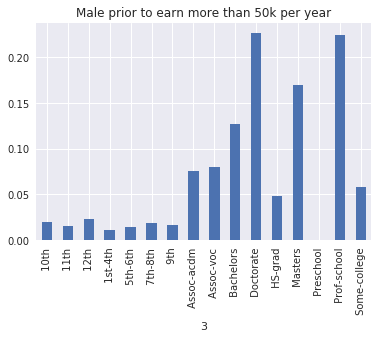

In [122]:
male_with_education_prior.plot.bar()
plt.title('Male prior to earn more than 50k per year')
plt.show()

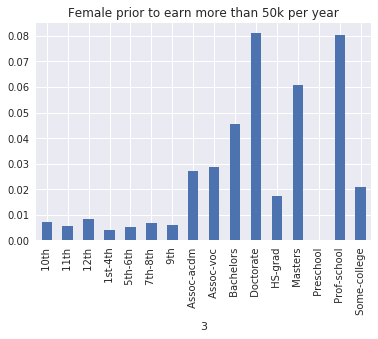

In [123]:
female_with_education_prior.plot.bar()
plt.title('Female prior to earn more than 50k per year')
plt.show()